In [1]:
# setup xelatex
!export PATH=/Library/TeX/texbin/xelatex:$PATH

# imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# model preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# model trainings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Set visualization styles for better aesthetics
sns.set(style="whitegrid")
plt.style.use('ggplot')

# Optional: Configure matplotlib for inline display in Jupyter Notebook
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('dataset/CustomerAttrition.csv')

# Display the first few rows to verify
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
# Get the shape of the dataset
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

# Get information about data types and missing values
df.info()

The dataset contains 10127 rows and 23 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                          

In [4]:
# Drop unnecessary columns
columns_to_drop = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
df.drop(columns=columns_to_drop, inplace=True)

# Verify the columns have been dropped
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [5]:
# Summary statistics for numerical columns
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n")
print(missing_values)

Missing Values in Each Column:

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


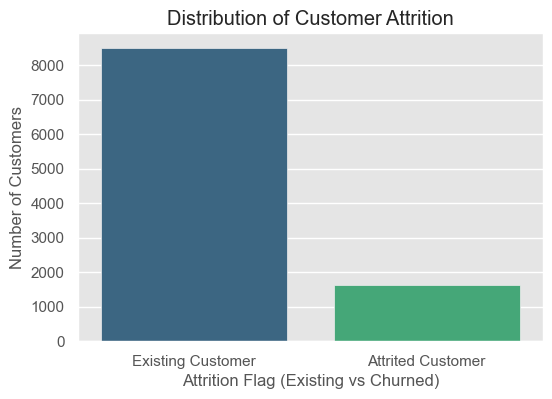

In [7]:
# Count plot for Attrition_Flag
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition_Flag', data=df, palette='viridis', hue='Attrition_Flag')
plt.title('Distribution of Customer Attrition')
plt.xlabel('Attrition Flag (Existing vs Churned)')
plt.ylabel('Number of Customers')
plt.show()

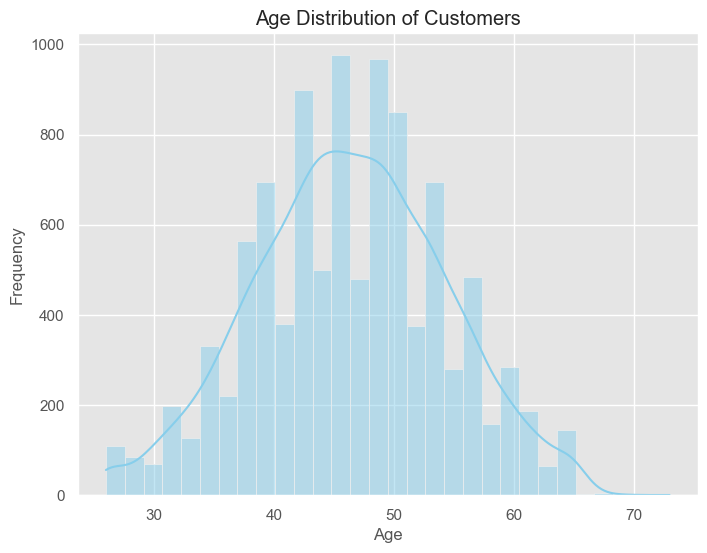

In [8]:
# Histogram for Customer_Age
plt.figure(figsize=(8,6))
sns.histplot(df['Customer_Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

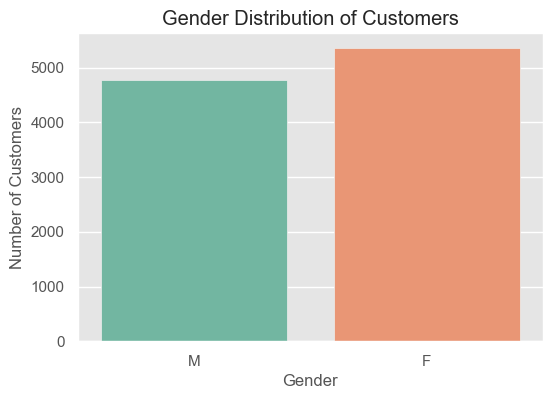

In [9]:
# Count plot for Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, palette='Set2', hue='Gender')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

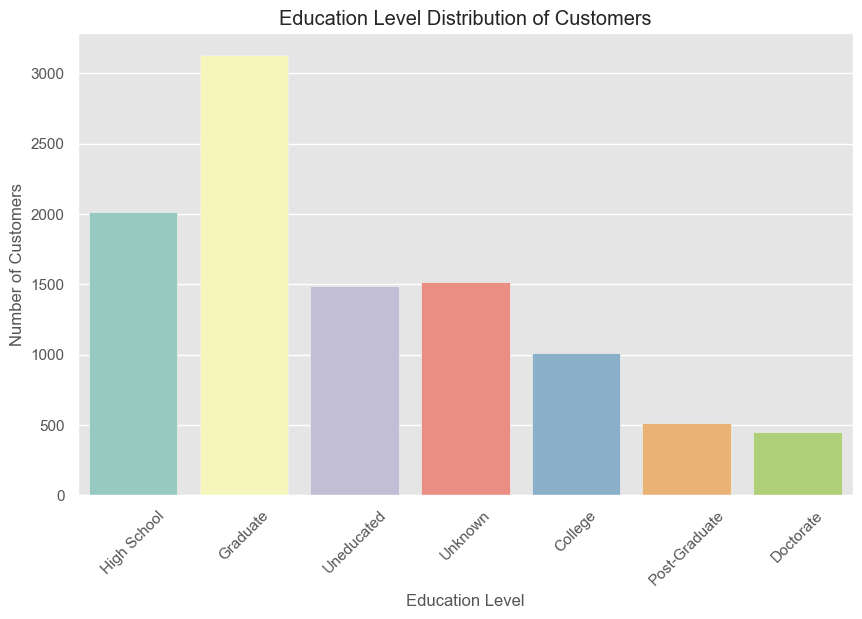

In [10]:
# Count plot for Education_Level
plt.figure(figsize=(10,6))
sns.countplot(x='Education_Level', data=df, palette='Set3', hue='Education_Level')
plt.title('Education Level Distribution of Customers')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

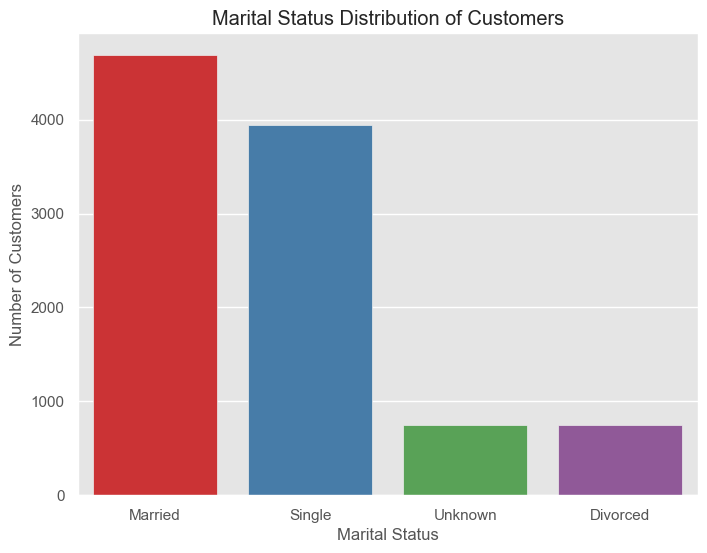

In [11]:
# Count plot for Marital_Status
plt.figure(figsize=(8,6))
sns.countplot(x='Marital_Status', data=df, palette='Set1', hue='Marital_Status')
plt.title('Marital Status Distribution of Customers')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.show()

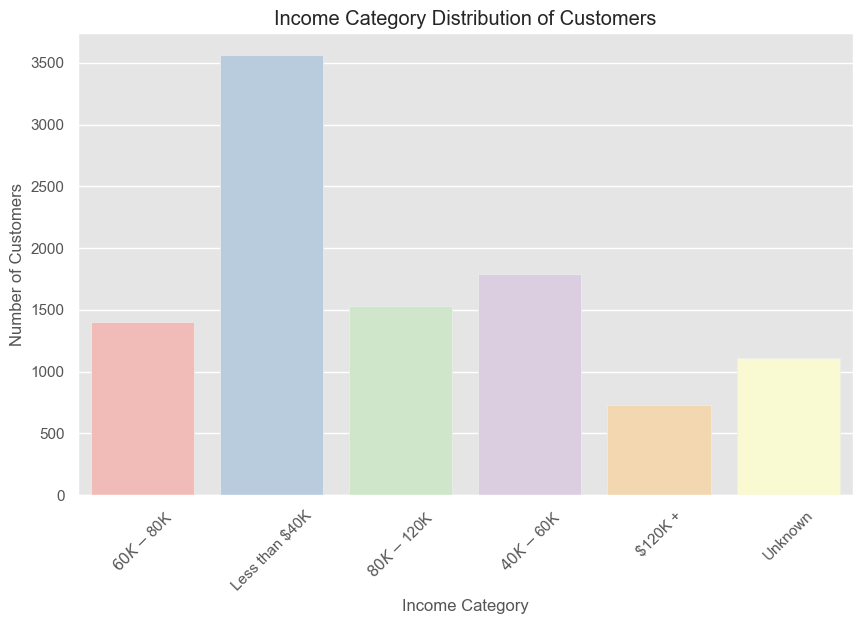

In [12]:
# Count plot for Income_Category
plt.figure(figsize=(10,6))
sns.countplot(x='Income_Category', data=df, palette='Pastel1', hue='Income_Category')
plt.title('Income Category Distribution of Customers')
plt.xlabel('Income Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

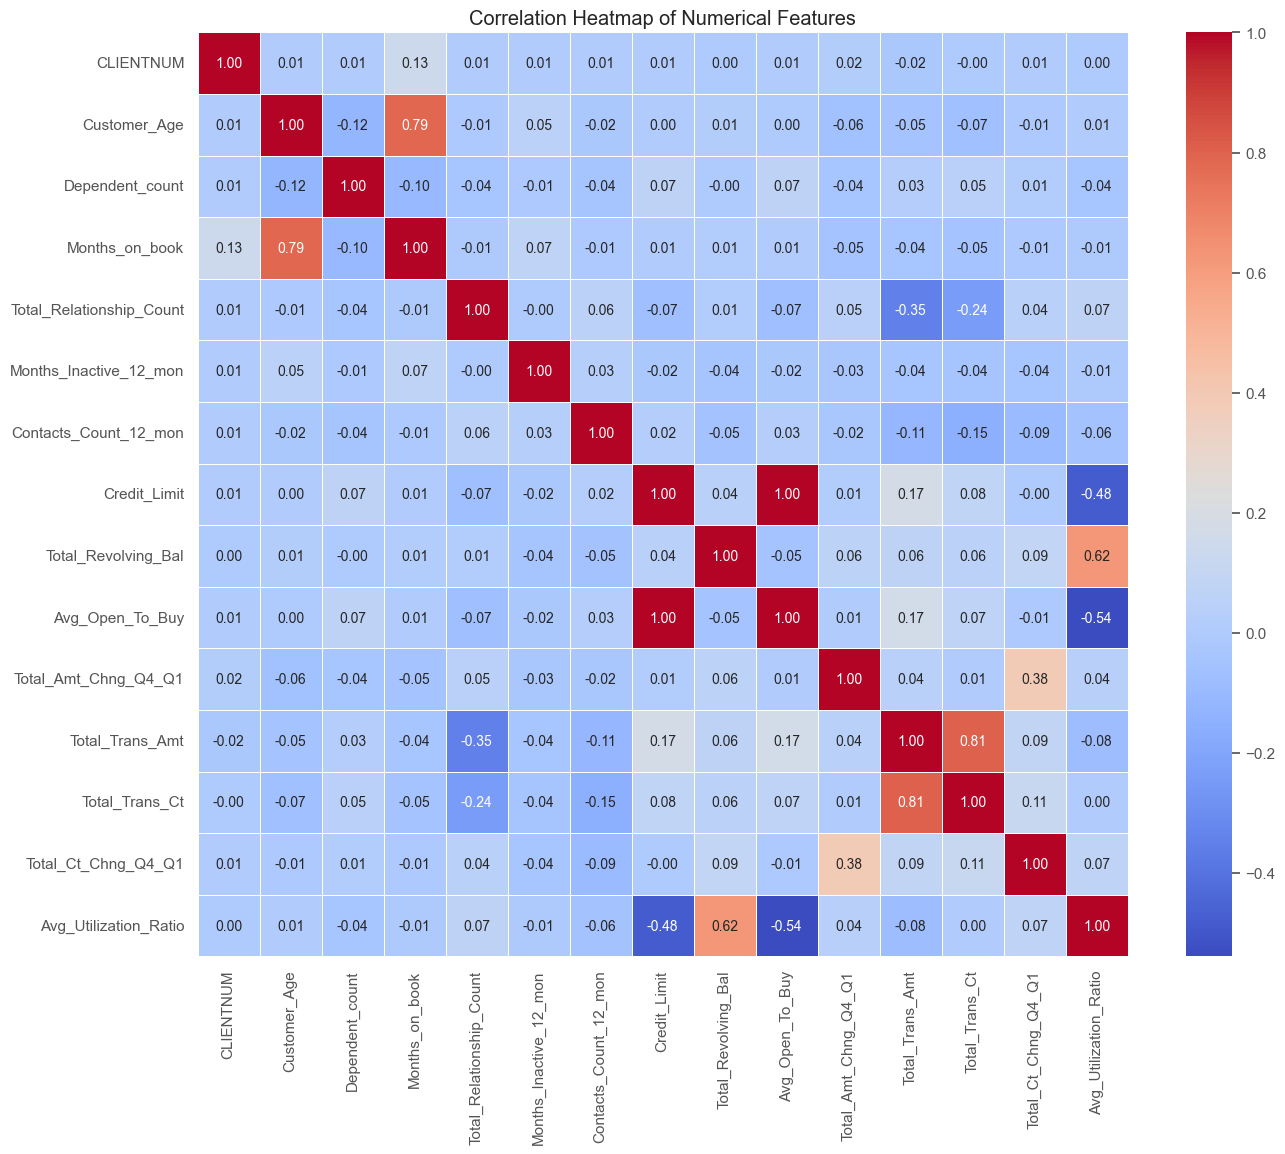

In [13]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Correlation matrix
# Plot the correlation heatmap
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [14]:
# # Pairplot for selected features
# selected_features = ['Customer_Age', 'Dependent_count', 'Months_on_book',
#                     'Total_Relationship_Count', 'Months_Inactive_12_mon',
#                     'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
#                     'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
#                     'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Attrition_Flag']
# sns.pairplot(df[selected_features], hue='Attrition_Flag', palette='Set2', diag_kind='kde')
# plt.suptitle('Pairplot of Selected Features', y=1.02)
# plt.show()

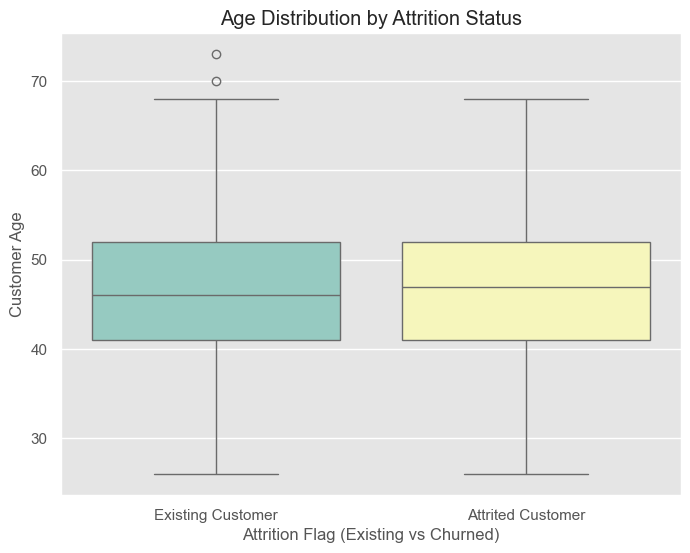

In [15]:
# Boxplot for Customer_Age by Attrition_Flag
plt.figure(figsize=(8,6))
sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=df, palette='Set3', hue='Attrition_Flag')
plt.title('Age Distribution by Attrition Status')
plt.xlabel('Attrition Flag (Existing vs Churned)')
plt.ylabel('Customer Age')
plt.show()

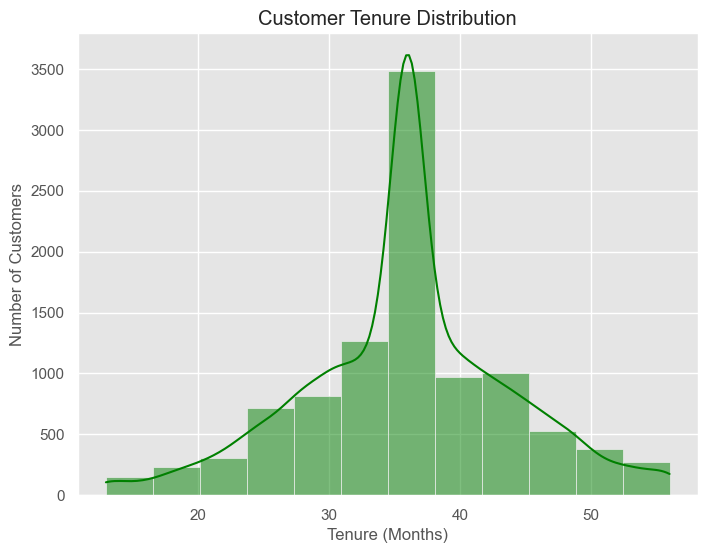

In [16]:
# Histogram for Months_on_book
plt.figure(figsize=(8,6))
sns.histplot(df['Months_on_book'], bins=12, kde=True, color='green')
plt.title('Customer Tenure Distribution')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()

In [17]:
# Encode categorical columns
label_encoder = LabelEncoder()

categorical_columns = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [18]:
# # Scale numeric features
# numeric_columns = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
#                    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 
#                    'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# scaler = StandardScaler()
# df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [19]:
# Split the data into training and testing sets
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Output the first few rows of the processed data for verification
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,3,3,4,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,5,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [20]:
## Logistic Regression

# Step 1: Build the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)

# Step 2: Make predictions
y_pred = logistic_model.predict(X_test)

# Step 3: Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(conf_matrix)
print(classification_rep)

[[ 149  347]
 [  93 2450]]
              precision    recall  f1-score   support

           0       0.62      0.30      0.40       496
           1       0.88      0.96      0.92      2543

    accuracy                           0.86      3039
   macro avg       0.75      0.63      0.66      3039
weighted avg       0.83      0.86      0.83      3039



In [21]:
# Try rebalancing the classes to improve results

from imblearn.over_sampling import SMOTE

# Step 1: Use SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 2: Train the Logistic Regression model again with balanced data
logistic_model_balanced = LogisticRegression(random_state=42, max_iter=1000)
logistic_model_balanced.fit(X_resampled, y_resampled)

# Step 3: Make predictions with the balanced model
y_pred_balanced = logistic_model_balanced.predict(X_test)

# Step 4: Evaluate the balanced model
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)
classification_rep_balanced = classification_report(y_test, y_pred_balanced)

print(conf_matrix_balanced, classification_rep_balanced)

[[ 305  191]
 [ 809 1734]]               precision    recall  f1-score   support

           0       0.27      0.61      0.38       496
           1       0.90      0.68      0.78      2543

    accuracy                           0.67      3039
   macro avg       0.59      0.65      0.58      3039
weighted avg       0.80      0.67      0.71      3039

